<a href="https://colab.research.google.com/github/chakravartulavinay/CAPSTONE_REGRESSION_PROJECT_UNP/blob/main/Concrete_Strength_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error

In [2]:
URL = "/content/drive/MyDrive/Concrete_Data.csv"
data = pd.read_csv(URL)
data

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
print(data.columns)

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')


In [4]:
data = data.rename(columns = {'Cement (component 1)(kg in a m^3 mixture)':'Cement',
                              'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Blast_Furnace_Slag',
                              'Fly Ash (component 3)(kg in a m^3 mixture)':'Fly_Ash',
                              'Water  (component 4)(kg in a m^3 mixture)':'Water',
                              'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
                              'Coarse Aggregate  (component 6)(kg in a m^3 mixture)': 'Coarse_Aggregate',
                              'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine_Aggregate',
                              'Age (day)':'Age',
                              'Concrete compressive strength(MPa, megapascals) ':'Concrete_compressive'})
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
data.duplicated().value_counts()

False    1005
True       25
dtype: int64

In [6]:
data = data.drop_duplicates()
data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [7]:
data.isna().sum()

Cement                  0
Blast_Furnace_Slag      0
Fly_Ash                 0
Water                   0
Superplasticizer        0
Coarse_Aggregate        0
Fine_Aggregate          0
Age                     0
Concrete_compressive    0
dtype: int64

In [8]:
data.shape

(1005, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1005 non-null   float64
 1   Blast_Furnace_Slag    1005 non-null   float64
 2   Fly_Ash               1005 non-null   float64
 3   Water                 1005 non-null   float64
 4   Superplasticizer      1005 non-null   float64
 5   Coarse_Aggregate      1005 non-null   float64
 6   Fine_Aggregate        1005 non-null   float64
 7   Age                   1005 non-null   int64  
 8   Concrete_compressive  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [10]:
data.describe()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716,35.250378
std,104.344261,86.170807,64.207969,21.339334,5.919967,77.579667,80.340435,63.734692,16.284815
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.700000,0.000000,0.000000,166.600000,0.000000,932.000000,724.300000,7.000000,23.520000
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.800000
75%,349.000000,142.500000,118.300000,192.900000,10.000000,1031.000000,822.200000,56.000000,44.870000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
data.corr()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_compressive
Cement,1.000000,-0.303324,-0.385610,-0.056625,0.060906,-0.086205,-0.245375,0.086348,0.488283
Blast_Furnace_Slag,-0.303324,1.000000,-0.312352,0.130262,0.019800,-0.277559,-0.289685,-0.042759,0.103374
Fly_Ash,-0.385610,-0.312352,1.000000,-0.283314,0.414213,-0.026468,0.090262,-0.158940,-0.080648
Water,-0.056625,0.130262,-0.283314,1.000000,-0.646946,-0.212480,-0.444915,0.279284,-0.269624
Superplasticizer,0.060906,0.019800,0.414213,-0.646946,1.000000,-0.241721,0.207993,-0.194076,0.344209
Coarse_Aggregate,-0.086205,-0.277559,-0.026468,-0.212480,-0.241721,1.000000,-0.162187,-0.005264,-0.144717
Fine_Aggregate,-0.245375,-0.289685,0.090262,-0.444915,0.207993,-0.162187,1.000000,-0.156572,-0.186448
Age,0.086348,-0.042759,-0.158940,0.279284,-0.194076,-0.005264,-0.156572,1.000000,0.337367
Concrete_compressive,0.488283,0.103374,-0.080648,-0.269624,0.344209,-0.144717,-0.186448,0.337367,1.000000


# EDA - Exploratory Data Analysis

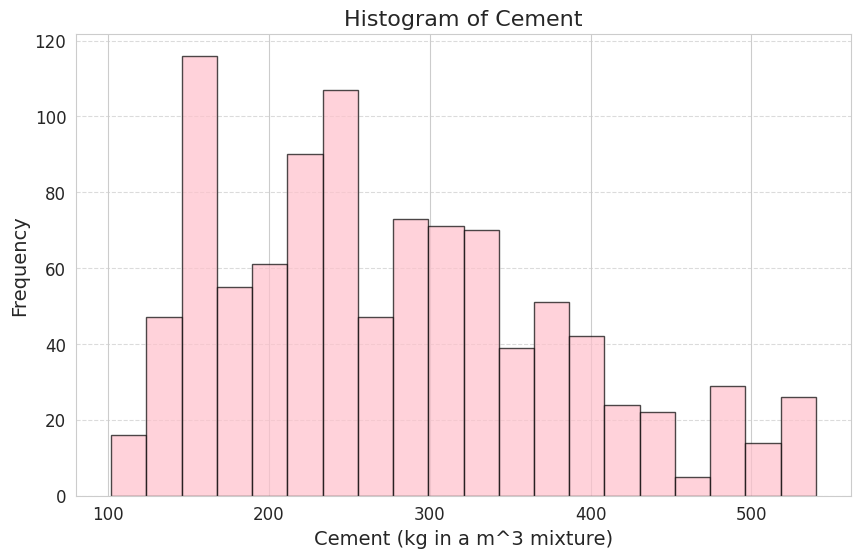

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.hist(data['Cement'], bins=20, color='pink', edgecolor='black', alpha=0.7)
plt.xlabel('Cement (kg in a m^3 mixture)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Cement', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

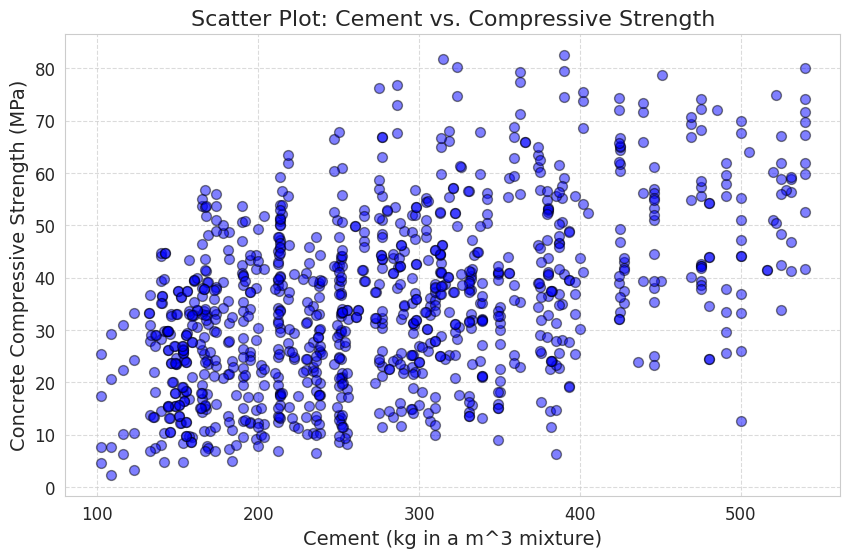

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(data['Cement'], data['Concrete_compressive'], alpha=0.5, c='blue', edgecolors='k', s=50)
plt.xlabel('Cement (kg in a m^3 mixture)', fontsize=14)
plt.ylabel('Concrete Compressive Strength (MPa)', fontsize=14)
plt.title('Scatter Plot: Cement vs. Compressive Strength', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

<Axes: title={'center': 'Heapmap'}>

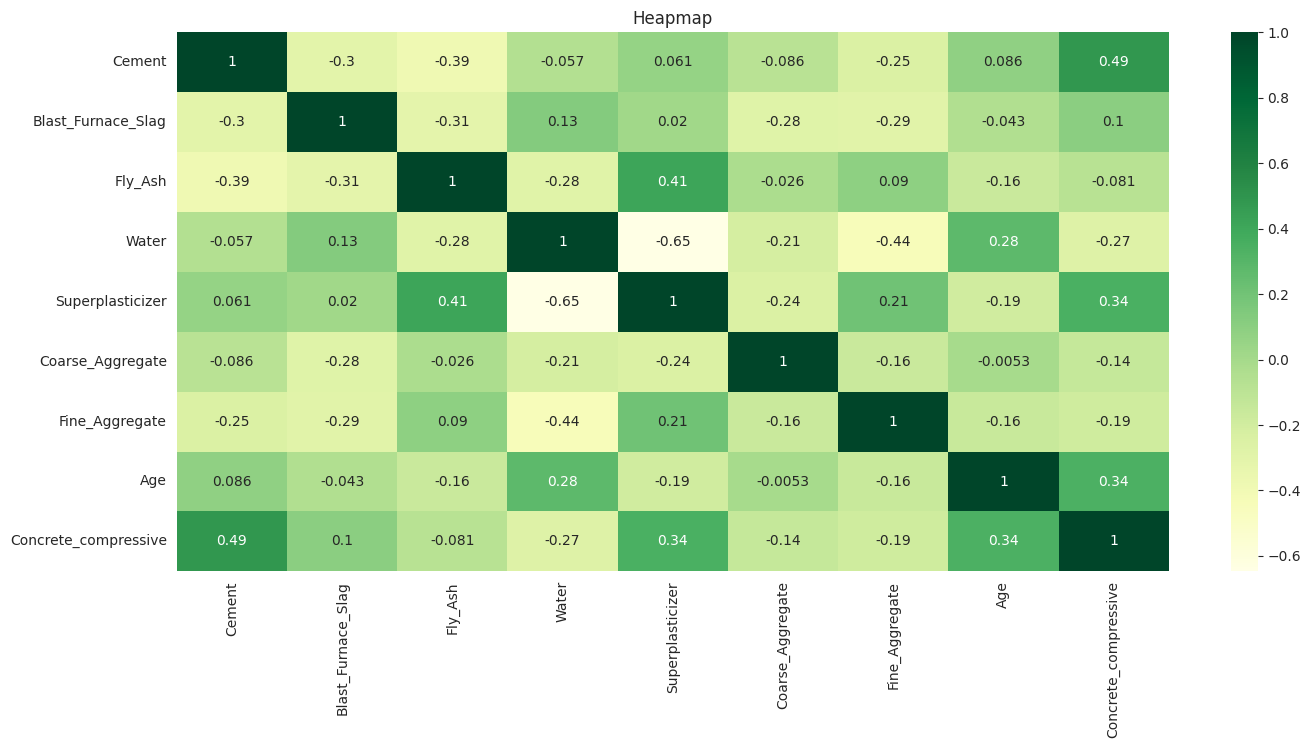

In [14]:
plt.figure(figsize = (16,7))
plt.title('Heapmap')
sns.heatmap(data.corr(),cmap = "YlGn",annot=True)

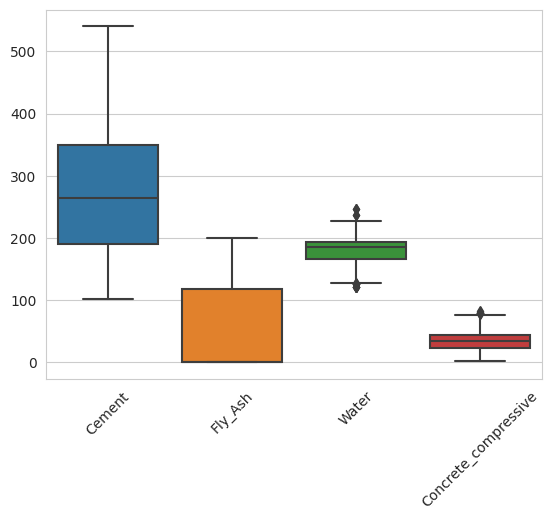

In [15]:
sns.boxplot(data=data[['Cement', 'Fly_Ash', 'Water', 'Concrete_compressive']])
plt.xticks(rotation=45)
plt.show()

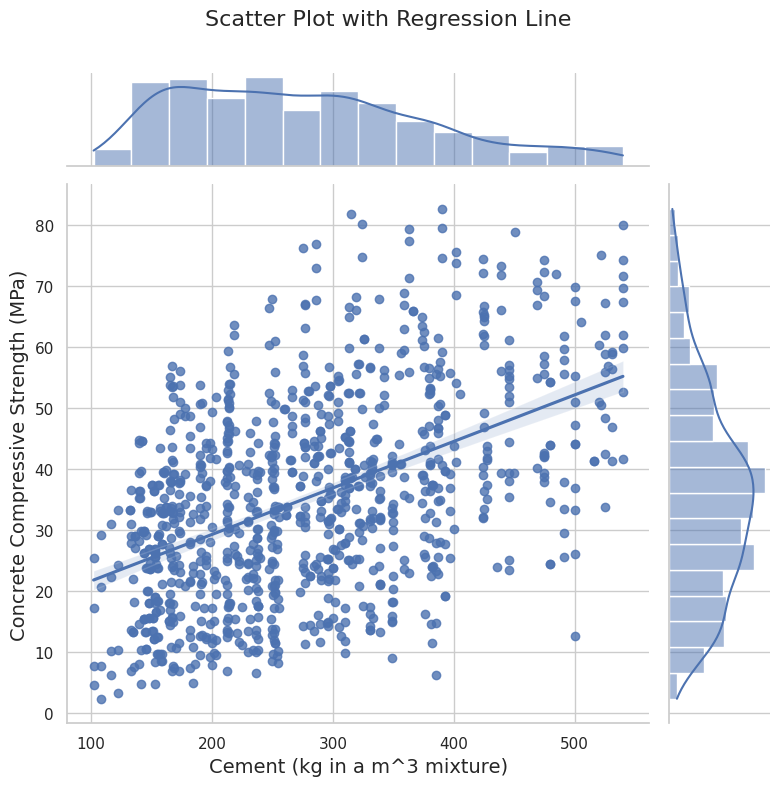

In [16]:
#Visualize relationships with regression lines
sns.set(style="whitegrid")
g = sns.jointplot(x='Cement', y='Concrete_compressive', data=data, kind='reg', height=8)
g.set_axis_labels('Cement (kg in a m^3 mixture)', 'Concrete Compressive Strength (MPa)', fontsize=14)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot with Regression Line', fontsize=16)
plt.show()

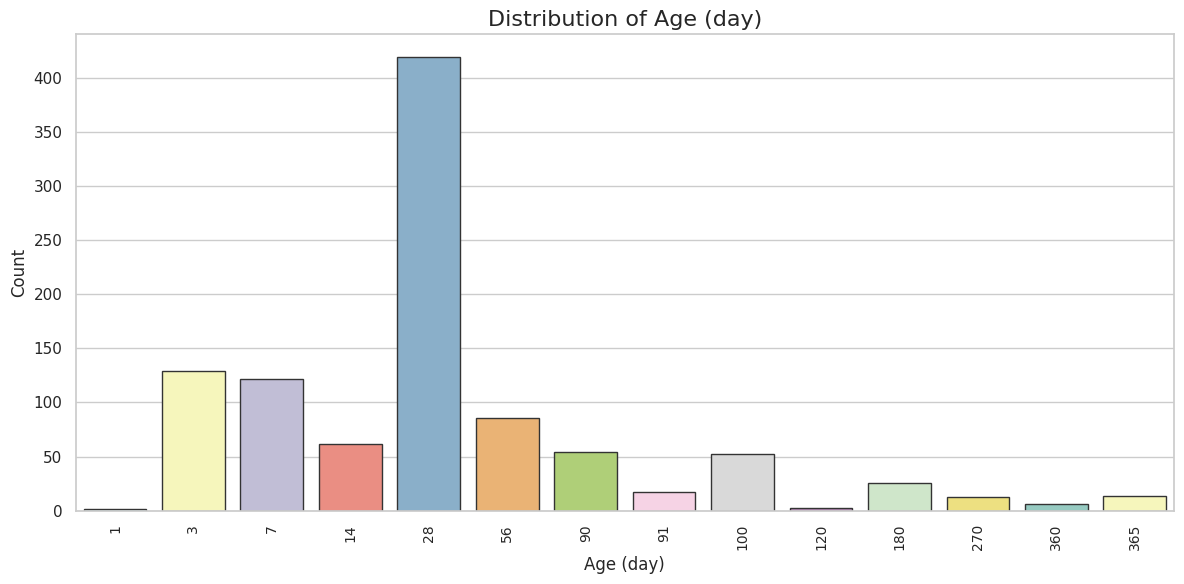

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Age', data=data, palette="Set3", edgecolor=".2")
ax.set_title('Distribution of Age (day)', fontsize=16)
ax.set_xlabel('Age (day)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params(axis='x', labelrotation=90, labelsize=10)
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

# Linear Regression

In [18]:
x = data.drop("Concrete_compressive",axis=1)
y = data["Concrete_compressive"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state =37)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(703, 8)
(302, 8)
(703,)
(302,)


In [21]:
regmodel = linear_model.LinearRegression()
regmodel.fit(x_train,y_train)

LinearRegression()

In [22]:
predictions = regmodel.predict(x_test)

In [23]:
y_test

186    24.89
425    32.90
668     4.78
382    64.02
227    32.85
       ...  
572    13.09
815    33.80
728    31.74
245    25.69
554    15.69
Name: Concrete_compressive, Length: 302, dtype: float64

In [24]:
mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)
rmse = math.sqrt(mean_squared_error(y_test,predictions))
print("Mean Squared Error: {mse}",format(mse,".2f"))
print("Mean Absolute Error (MAE):",format(mae,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse,".2f"))

Mean Squared Error: {mse} 104.43
Mean Absolute Error (MAE): 8.10
Root Mean Square Error (RMSE): {rmse} 10.22


In [25]:
r2 = r2_score(y_test,predictions)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.57


In [26]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y,test_size=0.2, random_state = 17)

In [27]:
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(804, 8)
(201, 8)
(804,)
(201,)


In [28]:
regmodel = linear_model.LinearRegression()
regmodel.fit(x_train1,y_train1)

LinearRegression()

In [29]:
predictions1 = regmodel.predict(x_test1)

In [30]:
mse1 = mean_squared_error(y_test1,predictions1)
mae1 = mean_absolute_error(y_test1,predictions1)
rmse1 = math.sqrt(mean_squared_error(y_test1,predictions1))
print("Mean Squared Error: {MSE1}",format(mse1,".2f"))
print("Mean Absolute Error (MAE1):",format(mae1,".2f"))
print("Root Mean Square Error (RMSE): {rmse1}",format(rmse1,".2f"))

Mean Squared Error: {MSE1} 113.74
Mean Absolute Error (MAE1): 8.22
Root Mean Square Error (RMSE): {rmse1} 10.66


In [31]:
r2 = r2_score(y_test1,predictions1)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.61


In [32]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.25, random_state = 27)

In [33]:
print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(753, 8)
(252, 8)
(753,)
(252,)


In [34]:
regmodel = linear_model.LinearRegression()
regmodel.fit(x_train2,y_train2)

LinearRegression()

In [35]:
predictions2 = regmodel.predict(x_test2)

In [36]:
mse2 = mean_squared_error(y_test2,predictions2)
mae2 = mean_absolute_error(y_test2,predictions2)
rmse2 = math.sqrt(mean_squared_error(y_test2,predictions2))
print("Mean Squared Error: {MSE2}",format(mse2,".2f"))
print("Mean Absolute Error (MAE2):",format(mae2,".2f"))
print("Root Mean Square Error (RMSE): {rmse2}",format(rmse2,".2f"))

Mean Squared Error: {MSE2} 106.66
Mean Absolute Error (MAE2): 7.99
Root Mean Square Error (RMSE): {rmse2} 10.33


In [37]:
r2 = r2_score(y_test2,predictions2)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.57


In [38]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x,y,test_size=0.4, random_state = 7)

In [39]:
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(603, 8)
(402, 8)
(603,)
(402,)


In [40]:
regmodel = linear_model.LinearRegression()
regmodel.fit(x_train3,y_train3)

LinearRegression()

In [41]:
predictions3 = regmodel.predict(x_test3)

In [42]:
mse3 = mean_squared_error(y_test3,predictions3)
mae3 = mean_absolute_error(y_test3,predictions3)
rmse3 = math.sqrt(mean_squared_error(y_test3,predictions3))
print("Mean Squared Error: {MSE3}",format(mse3,".2f"))
print("Mean Absolute Error (MAE3):",format(mae3,".2f"))
print("Root Mean Square Error (RMSE): {rmse3}",format(rmse3,".2f"))

Mean Squared Error: {MSE3} 95.73
Mean Absolute Error (MAE3): 7.79
Root Mean Square Error (RMSE): {rmse3} 9.78


In [43]:
r2 = r2_score(y_test3,predictions3)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.62


# Decision Tree Regression

In [44]:
regressor = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10, min_samples_split = 10, random_state = 90)
## we can use "'friedman_mse', 'squared_error', 'poisson', 'absolute_error'" as values of criterion

In [45]:
regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=90)

In [46]:
regressor.feature_importances_

array([0.30636956, 0.08504525, 0.01071471, 0.1078136 , 0.04557615,
       0.01646699, 0.0404245 , 0.38758924])

In [47]:
y_predict = regressor.predict(x_test)

In [48]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Squared Error: {MSE}",format(mse,".2f"))
print("Mean Absolute Error (MAE):",format(mae,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse,".2f"))

Mean Squared Error: {MSE} 59.11
Mean Absolute Error (MAE): 5.40
Root Mean Square Error (RMSE): {rmse} 7.69


In [49]:
r2 = r2_score(y_test,y_predict)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.76


In [50]:
cross_val_score(regressor, x_train, y_train, cv = 10)

array([0.82245457, 0.50800017, 0.67848431, 0.74976161, 0.81871018,
       0.58820639, 0.7771824 , 0.80306017, 0.86300915, 0.86003601])

In [51]:
regressor = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10, min_samples_split = 10, random_state = 9)

In [52]:
regressor.fit(x_train1, y_train1)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=9)

In [53]:
y_predict1 = regressor.predict(x_test1)

In [54]:
mse1 = mean_squared_error(y_test1,y_predict1)
mae1 = mean_absolute_error(y_test1,y_predict1)
rmse1 = math.sqrt(mean_squared_error(y_test1,y_predict1))
print("Mean Squared Error: {MSE}",format(mse1,".2f"))
print("Mean Absolute Error (MAE):",format(mae1,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse1,".2f"))

Mean Squared Error: {MSE} 45.86
Mean Absolute Error (MAE): 4.83
Root Mean Square Error (RMSE): {rmse} 6.77


In [55]:
r2 = r2_score(y_test1,y_predict1)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.84


In [56]:
cross_val_score(regressor, x_train1, y_train1, cv = 10)

array([0.76166479, 0.86024537, 0.72285432, 0.84185873, 0.81767486,
       0.61715145, 0.77656441, 0.78537974, 0.86021132, 0.75465279])

In [57]:
regressor = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10, min_samples_split = 10, random_state = 89)

In [58]:
regressor.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=89)

In [59]:
y_predict2 = regressor.predict(x_test2)

In [60]:
mse2 = mean_squared_error(y_test2,y_predict2)
mae2 = mean_absolute_error(y_test2,y_predict2)
rmse2 = math.sqrt(mean_squared_error(y_test2,y_predict2))
print("Mean Squared Error: {MSE}",format(mse2,".2f"))
print("Mean Absolute Error (MAE):",format(mae2,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse2,".2f"))

Mean Squared Error: {MSE} 52.44
Mean Absolute Error (MAE): 5.35
Root Mean Square Error (RMSE): {rmse} 7.24


In [61]:
r2 = r2_score(y_test2,y_predict2)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.79


In [62]:
cross_val_score(regressor, x_train2, y_train2, cv = 10)

array([0.85461595, 0.83465025, 0.75293006, 0.69672876, 0.8845779 ,
       0.8359972 , 0.8135372 , 0.80549125, 0.7680734 , 0.85908588])

In [63]:
regressor = DecisionTreeRegressor(criterion = "squared_error", max_depth = 10, min_samples_split = 10, random_state = 3)

In [64]:
regressor.fit(x_train3, y_train3)

DecisionTreeRegressor(max_depth=10, min_samples_split=10, random_state=3)

In [65]:
y_predict3 = regressor.predict(x_test3)

In [66]:
mse3 = mean_squared_error(y_test3,y_predict3)
mae3 = mean_absolute_error(y_test3,y_predict3)
rmse3 = math.sqrt(mean_squared_error(y_test3,y_predict3))
print("Mean Squared Error: {MSE}",format(mse3,".2f"))
print("Mean Absolute Error (MAE):",format(mae3,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse3,".2f"))

Mean Squared Error: {MSE} 53.86
Mean Absolute Error (MAE): 5.40
Root Mean Square Error (RMSE): {rmse} 7.34


In [67]:
r2 = r2_score(y_test3,y_predict3)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.79


In [68]:
cross_val_score(regressor, x_train3, y_train3, cv = 10)

array([0.82403157, 0.80696931, 0.85051028, 0.82183059, 0.7623303 ,
       0.78441474, 0.75827774, 0.77377836, 0.77123412, 0.79153734])

# Random Forest - Regression


In [69]:
rf_regressor = RandomForestRegressor(n_estimators = 200, random_state = 50) ##even for classifier we can use n_estimators.
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=50)

In [70]:
y_predict = rf_regressor.predict(x_test)

In [71]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Squared Error: {MSE}",format(mse,".2f"))
print("Mean Absolute Error (MAE):",format(mae,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse,".2f"))

Mean Squared Error: {MSE} 25.36
Mean Absolute Error (MAE): 3.61
Root Mean Square Error (RMSE): {rmse} 5.04


In [72]:
r2 = r2_score(y_test,y_predict)
print("R-squared:",format(r2,'.3f'))

R-squared: 0.897


In [73]:
rf_regressor.fit(x_train1, y_train1)

RandomForestRegressor(n_estimators=200, random_state=50)

In [74]:
y_predict1 = rf_regressor.predict(x_test1)

In [75]:
mse1 = mean_squared_error(y_test1,y_predict1)
mae1 = mean_absolute_error(y_test1,y_predict1)
rmse1 = math.sqrt(mean_squared_error(y_test1,y_predict1))
print("Mean Squared Error: {MSE}",format(mse1,".2f"))
print("Mean Absolute Error (MAE):",format(mae1,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse1,".2f"))

Mean Squared Error: {MSE} 29.01
Mean Absolute Error (MAE): 3.63
Root Mean Square Error (RMSE): {rmse} 5.39


In [76]:
r2 = r2_score(y_test1,y_predict1)
print("R-squared:",format(r2,'.3f'))

R-squared: 0.901


In [77]:
rf_regressor.fit(x_train2, y_train2)

RandomForestRegressor(n_estimators=200, random_state=50)

In [78]:
y_predict2 = rf_regressor.predict(x_test2)

In [79]:
mse2 = mean_squared_error(y_test2,y_predict2)
mae2 = mean_absolute_error(y_test2,y_predict2)
rmse2 = math.sqrt(mean_squared_error(y_test2,y_predict2))
print("Mean Squared Error: {MSE}",format(mse2,".2f"))
print("Mean Absolute Error (MAE):",format(mae2,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse2,".2f"))

Mean Squared Error: {MSE} 23.18
Mean Absolute Error (MAE): 3.39
Root Mean Square Error (RMSE): {rmse} 4.81


In [80]:
r2 = r2_score(y_test2,y_predict2)
print("R-squared:",format(r2,'.3f')) ##best

R-squared: 0.907


In [81]:
rf_regressor.fit(x_train3, y_train3)

RandomForestRegressor(n_estimators=200, random_state=50)

In [82]:
y_predict3 = rf_regressor.predict(x_test3)

In [83]:
mse3 = mean_squared_error(y_test3,y_predict3)
mae3 = mean_absolute_error(y_test3,y_predict3)
rmse3 = math.sqrt(mean_squared_error(y_test3,y_predict3))
print("Mean Squared Error: {MSE}",format(mse3,".2f"))
print("Mean Absolute Error (MAE):",format(mae3,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse3,".2f"))

Mean Squared Error: {MSE} 32.08
Mean Absolute Error (MAE): 3.93
Root Mean Square Error (RMSE): {rmse} 5.66


In [84]:
r2 = r2_score(y_test3,y_predict3)
print("R-squared:",format(r2,'.3f'))

R-squared: 0.873


# K-Nearest Neighbor Regression


In [85]:
knn_regressor = KNeighborsRegressor(n_neighbors=11)
knn_regressor.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [86]:
y_predict = knn_regressor.predict(x_test)

In [87]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Squared Error: {MSE}",format(mse,".2f"))
print("Mean Absolute Error (MAE):",format(mae,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse,".2f"))

Mean Squared Error: {MSE} 92.15
Mean Absolute Error (MAE): 7.40
Root Mean Square Error (RMSE): {rmse} 9.60


In [88]:
r2 = r2_score(y_test,y_predict)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.62


In [89]:
knn_regressor.fit(x_train1, y_train1)

KNeighborsRegressor(n_neighbors=11)

In [90]:
y_predict1 = knn_regressor.predict(x_test1)

In [91]:
mse1 = mean_squared_error(y_test1,y_predict1)
mae1 = mean_absolute_error(y_test1,y_predict1)
rmse1 = math.sqrt(mean_squared_error(y_test1,y_predict1))
print("Mean Squared Error: {MSE}",format(mse1,".2f"))
print("Mean Absolute Error (MAE):",format(mae1,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse1,".2f"))

Mean Squared Error: {MSE} 102.83
Mean Absolute Error (MAE): 7.69
Root Mean Square Error (RMSE): {rmse} 10.14


In [92]:
r2 = r2_score(y_test1,y_predict1) ##best
print("R-squared:",format(r2,'.2f'))

R-squared: 0.65


In [93]:
knn_regressor.fit(x_train2, y_train2)

KNeighborsRegressor(n_neighbors=11)

In [94]:
y_predict2 = knn_regressor.predict(x_test2)

In [95]:
mse2 = mean_squared_error(y_test2,y_predict2)
mae2 = mean_absolute_error(y_test2,y_predict2)
rmse2 = math.sqrt(mean_squared_error(y_test2,y_predict2))
print("Mean Squared Error: {MSE}",format(mse2,".2f"))
print("Mean Absolute Error (MAE):",format(mae2,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse2,".2f"))

Mean Squared Error: {MSE} 93.31
Mean Absolute Error (MAE): 7.36
Root Mean Square Error (RMSE): {rmse} 9.66


In [96]:
r2 = r2_score(y_test2,y_predict2)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.62


In [97]:
knn_regressor.fit(x_train3, y_train3)

KNeighborsRegressor(n_neighbors=11)

In [98]:
y_predict3 = knn_regressor.predict(x_test3)

In [99]:
mse3 = mean_squared_error(y_test3,y_predict3)
mae3 = mean_absolute_error(y_test3,y_predict3)
rmse3 = math.sqrt(mean_squared_error(y_test3,y_predict3))
print("Mean Squared Error: {MSE}",format(mse3,".2f"))
print("Mean Absolute Error (MAE):",format(mae3,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse3,".2f"))

Mean Squared Error: {MSE} 90.68
Mean Absolute Error (MAE): 7.53
Root Mean Square Error (RMSE): {rmse} 9.52


In [100]:
r2 = r2_score(y_test3,y_predict3)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.64


# SVM


In [101]:
svr_regressor = SVR(kernel = "poly",C = 100)
svr_regressor.fit(x_train, y_train)

SVR(C=100, kernel='poly')

In [102]:
y_predict = svr_regressor.predict(x_test)

In [103]:
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
rmse = math.sqrt(mean_squared_error(y_test,y_predict))
print("Mean Squared Error: {MSE}",format(mse,".2f"))
print("Mean Absolute Error (MAE):",format(mae,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse,".2f"))

Mean Squared Error: {MSE} 69.54
Mean Absolute Error (MAE): 6.40
Root Mean Square Error (RMSE): {rmse} 8.34


In [104]:
r2 = r2_score(y_test,y_predict)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.72


In [105]:
svr_regressor = SVR(kernel = "poly", C = 100)
svr_regressor.fit(x_train1, y_train1)

SVR(C=100, kernel='poly')

In [106]:
y_predict1 = svr_regressor.predict(x_test1)

In [107]:
mse1 = mean_squared_error(y_test1,y_predict1)
mae1 = mean_absolute_error(y_test1,y_predict1)
rmse1 = math.sqrt(mean_squared_error(y_test1,y_predict1))
print("Mean Squared Error: {MSE}",format(mse1,".2f"))
print("Mean Absolute Error (MAE):",format(mae1,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse1,".2f"))

Mean Squared Error: {MSE} 70.40
Mean Absolute Error (MAE): 6.47
Root Mean Square Error (RMSE): {rmse} 8.39


In [108]:
r2 = r2_score(y_test1,y_predict1) ##best
print("R-squared:",format(r2,'.2f'))

R-squared: 0.76


In [109]:
svr_regressor.fit(x_train2, y_train2)

SVR(C=100, kernel='poly')

In [110]:
y_predict2 = svr_regressor.predict(x_test2)

In [111]:
mse2 = mean_squared_error(y_test2,y_predict2)
mae2 = mean_absolute_error(y_test2,y_predict2)
rmse2 = math.sqrt(mean_squared_error(y_test2,y_predict2))
print("Mean Squared Error: {MSE}",format(mse2,".2f"))
print("Mean Absolute Error (MAE):",format(mae2,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse2,".2f"))

Mean Squared Error: {MSE} 75.12
Mean Absolute Error (MAE): 6.45
Root Mean Square Error (RMSE): {rmse} 8.67


In [112]:
r2 = r2_score(y_test2,y_predict2) ##best
print("R-squared:",format(r2,'.2f'))

R-squared: 0.70


In [113]:
svr_regressor.fit(x_train3, y_train3)

SVR(C=100, kernel='poly')

In [114]:
y_predict3 = svr_regressor.predict(x_test3)

In [115]:
mse3 = mean_squared_error(y_test3,y_predict3)
mae3 = mean_absolute_error(y_test3,y_predict3)
rmse3 = math.sqrt(mean_squared_error(y_test3,y_predict3))
print("Mean Squared Error: {MSE}",format(mse3,".2f"))
print("Mean Absolute Error (MAE):",format(mae3,".2f"))
print("Root Mean Square Error (RMSE): {rmse}",format(rmse3,".2f"))

Mean Squared Error: {MSE} 68.40
Mean Absolute Error (MAE): 6.31
Root Mean Square Error (RMSE): {rmse} 8.27


In [116]:
r2 = r2_score(y_test3,y_predict3)
print("R-squared:",format(r2,'.2f'))

R-squared: 0.73
